In [2]:
import torch
from torch import nn
import matplotlib.pyplot as plt


In [3]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
import numpy as np

# Generate sample regression data
X, y = make_regression(n_samples=500, n_features=10, noise=15, random_state=42)

# Resize target Y
y = y.reshape(-1, 1)

# Train/test partition
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# NumPy'den torch tensor'lara dönüştür
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)


In [4]:
model = nn.Sequential(
    nn.Linear(10, 64),
    nn.ReLU(),
    nn.Linear(64, 1)
)

In [5]:
loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)


In [6]:
losses = []
epochs = 100

for epoch in range(epochs):
    model.train()
    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)
    losses.append(loss.item())

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 10 == 0:
        print(f"Epoch {epoch}: Loss = {loss.item():.4f}")


Epoch 0: Loss = 21521.3555
Epoch 10: Loss = 15014.6104
Epoch 20: Loss = 12274.0195
Epoch 30: Loss = 15005.4424
Epoch 40: Loss = 20937.3809
Epoch 50: Loss = 21259.7168
Epoch 60: Loss = 14051.0400
Epoch 70: Loss = 18549.6035
Epoch 80: Loss = 20134.5723
Epoch 90: Loss = 21656.4980


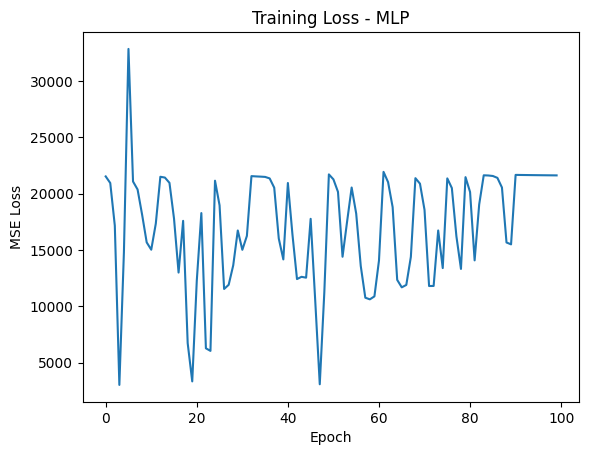

In [7]:
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.title("Training Loss - MLP")
plt.show()
